In [ ]:
import sympy
from sympy import Eq, S, latex, plot_implicit, Matrix, symbols
from sympy import simplify, expand, collect, solve, solveset
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
import numpy as np
import pandas as pd
from IPython.display import Latex
from google.colab import files

# Практическое занятие 14
# Компьютерный практикум по алгебре на Python
### Задание 1.
Составить матрицу квадратичной формы $16x^2-21y^2+3z^2-4xy-4xz+10yz$, проверить, что она определяет именно заданный многочлен.



In [ ]:
x, y, z = sympy.symbols('x y z')
A = Matrix([[16, -2, -2], [-2, -21, 5], [-2, 5, 3]])
X = Matrix([x, y, z])
u = 16 * x **2 - 21 * y**2 + 3 * z**2 - 4 * x * y - 4 * x * z + 10 * y * z
checkPolynomial = sympy.simplify(expand(X.T * A * X)[0])
display(Latex(fr"u = {latex(u)}, \quad A = {latex(A)}"))
display(Latex(fr"X^T A X = {latex(checkPolynomial )}, \quad X^T A X - u = {latex(checkPolynomial - u)}"))

### Задание 2.
Заданы векторы  $e_1=(1, 0, 1)$, $e_2=(-1, 0, 1)$, $e_1=(0, 1, 0)$.
Вывести (используя цикл!) на экран матрицу квадратичной формы Задания 1 в новом базисе из векторов


1.   ($e_1$, $e_2$, $e_3$),
2.   ($e_1$, $e_2 - e_1$, $e_3$),
3.   ($e_1$, $e_2$, $e_3 - e_1$),
4.   ($e_1$, $e_2 - e_1$, $e_3 - e_1$),
5.   ($e_1 + e_2$, $e_2$, $e_3 + e_2$),

при этом в файл "task2.xlsx" записать на листы $A_1$, $A_2$, ... матрицы в новом базисе, а на листы  $P_1$, $P_2$, ... соответствующие матрицы перехода.

In [52]:
# Функция для составления матрицы перехода по n-ому количеству базисных векторов
def CreateTransformMatrix(lstBazisVecs):
  mx = Matrix([])
  for i in range(len(lstBazisVecs)):
    mx = mx.row_join(lstBazisVecs[i])
  return mx

e_1 = Matrix([1, 0, 1])
e_2 = Matrix([-1, 0, 1])
e_3 = Matrix([0, 1, 0])
lstVecData = [[e_1, e_2, e_3], [e_1, e_2 - e_1, e_3], [e_1, e_2, e_3 - e_1], [e_1, e_2 - e_1, e_3 - e_1], [e_1 + e_2, e_2, e_3 + e_2]]

file_name_cur = "task2.xlsx"
with pd.ExcelWriter(file_name_cur, mode = "w") as witer_w:
  df_plug = pd.DataFrame([])
  df_plug.to_excel(witer_w, sheet_name = 'Blank', header = False, index = False)

with pd.ExcelWriter(file_name_cur, mode = "a") as writer_2:
  for i in range(len(lstVecData)):
    P_cur = CreateTransformMatrix(lstVecData[i])

    P_cur_np = np.array(P_cur).astype(np.float64)
    A_new_np = np.array(P_cur.T * A * P_cur).astype(np.float64)
    A_new_df = pd.DataFrame(A_new_np)
    P_cur_df = pd.DataFrame(P_cur_np)

    A_new_df.to_excel(writer_2, sheet_name = f"A{i + 1}", index = False, header = False)
    P_cur_df.to_excel(writer_2, sheet_name = f"P{i + 1}", index = False, header = False)

    display(Latex(fr"A_{(i + 1)} = {latex(P_cur.T * A * P_cur)}"))

files.download(file_name_cur)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Задание 3.
В цикле из файла "task3.xlsx" считать матрицы, вывести на экран каждую матрицу и ее собственные числа и собственные векторы.

In [ ]:
uploaded_files_dct = files.upload()
file_name = [name for name in uploaded_files_dct.keys()][0]

lstMatrix= []
for i in range(5):
  tmpMatrixDf = pd.read_excel(file_name, sheet_name = f"A{i + 1}", header = None)
  tmpMatrix = sympy.Matrix(tmpMatrixDf.to_numpy())
  lstMatrix.append(tmpMatrix)

In [ ]:
for i in range(len(lstMatrix)):
  display(Latex(fr"[{latex(i + 1)}]. \ A_{latex(i + 1)} = {latex(lstMatrix[i])}"))
  lstEigenNums = [vecData[0] for vecData in lstMatrix[i].eigenvects()]
  lstEigenVecs = [vecData[2][j].T for vecData in lstMatrix[i].eigenvects() for j in range(len(vecData[2]))]
  display(Latex(fr"\text{{Собственные числа:}} {latex(lstEigenNums)}"))
  display(Latex(fr"\text{{Собственные вектора:}}"))
  for vec in lstEigenVecs:
    display(Latex(fr"{latex(vec)}"))
  print()

### Задание 4.
Привести квадратичную форму с матрицей
$$
\left[\begin{matrix}-645 & -12 & -960\\-12 & 3 & 9\\-960 & 9 & -1205\end{matrix}\right]
$$
к каноническому виду с помощью перехода к новому базису из собственных векторов.

Вывести на экран матрицу перехода к новому базису, матрицу квадратичной формы в новом базисе и квадратичную форму в старом и новом базисе (в виде многочлена от переменных $x$, $y$, $z$).

In [ ]:
# Функция для нахождения матрицы перехода в базис из собственных нормированных векторов
def EigenTransitionMx(mx):
  lstEigenData = mx.eigenvects()
  transitionMx = Matrix()
  for i in range(len(lstEigenData)):
    for eVec in lstEigenData[i][2]:
      transitionMx = transitionMx.row_join(eVec.normalized())
  return transitionMx

X = Matrix([x, y, z])
A_4 = Matrix([[-645, -12, -960], [-12, 3, 9], [-960, 9, -1205]])
P_4 = EigenTransitionMx(A_4)
oldQuadForm = sympy.simplify(expand(X.T * A_4 * X)[0])
A_4_new = P_4.T * A_4 * P_4
newQuadForm = sympy.simplify(expand(X.T * A_4_new * X)[0])
display(Latex(fr"A = {latex(A_4)}"))
display(Latex(fr"u = {latex(oldQuadForm)}"))
display(Latex(fr"\text{{Матрица перехода к новому базису P = }} {latex(P_4)}"))
display(Latex(fr"A_{{new}} \ = {latex(A_4_new)}"))
display(Latex(fr"u_{{new}} = {latex(newQuadForm)}"))

### Задание 5*.
Определить тип кривой второго порядка, заданной уравнением
$$
97x^2 - 144xy + 97y^2 + 482x - 532y = 3452
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика.

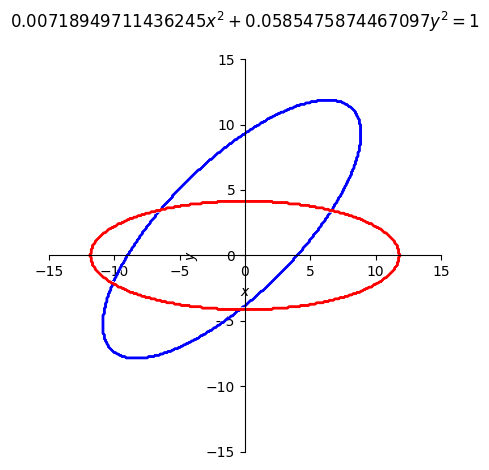

<IPython.core.display.Latex object>

In [139]:
# Функция составляющая матрицу квадратичной формы по коэфиентам квадратичной формы 2-го порядка
def ConvertQuadFormToMx(lstCoefs, needInt = True):
  mxGrid = Matrix([[0] * 3 for i in range(3)])
  lstDiagCoefs = [lstCoefs[i] for i in [0,2,5]]
  lstNotDiagCoefs = [lstCoefs[i]/2 for i in [1, 3, 4]]
  if (needInt):
    lstNotDiagCoefs = [int(num) for num in lstNotDiagCoefs]
  for i in range(len(lstDiagCoefs)):
    mxGrid[i,i] = lstDiagCoefs[i]
  mxGrid[1, 0] = lstNotDiagCoefs[0]
  mxGrid[0, 1] = lstNotDiagCoefs[0]
  mxGrid[0, 2] = lstNotDiagCoefs[1]
  mxGrid[2, 0] = lstNotDiagCoefs[1]
  mxGrid[2, 1] = lstNotDiagCoefs[2]
  mxGrid[1, 2] = lstNotDiagCoefs[2]
  return mxGrid

# Функция для замены приближенных к нулю чисел после вычислений на 0
def CorrectZeroRepr(mx):
  for i in range(mx.shape[0]):
    for j in range(mx.shape[1]):
      if abs(mx[i, j]) < 10**(-13):
        mx[i, j] = 0
  return mx

# Функция для преобразования уравнения к каноническому виду
def ConvertToCanonical(eq):
  freeCoef = eq.subs({'x': 0, 'y' : 0})
  return Eq(eq/(-freeCoef) + 1, 1)

X = Matrix([x, y, 1])
quadForm5 = Eq(97 * x**2 - 144 * x * y + 97 * y**2 + 482 * x - 532 * y - 3456, 0)
lstCoefs = [97, -144, 97, 482, -532, -3452]
mxQuad5 = ConvertQuadFormToMx(lstCoefs, False)
P_5 = EigenTransitionMx(mxQuad5)
mxQuadNew5 = CorrectZeroRepr(P_5.T * mxQuad5 * P_5)
quadFormNew5 = simplify(expand(X.T * mxQuadNew5 * X)[0])
canonicalQuadForm5 = ConvertToCanonical(quadFormNew5)

plt = plot_implicit(quadForm5, (x, -15, 15), (y, -15, 15),
                  aspect_ratio = (1, 1),
                  line_color='blue',
                  xlabel='$x$', ylabel='$y$',
                   title=f'{latex(canonicalQuadForm5, mode="inline")}\n',
                   adaptive=False, show=False)
plt.append((plot_implicit(canonicalQuadForm5, (x, -15, 15), (y, -15, 15),
                       line_color='red', aspect_ratio = (1, 1),
                        adaptive=False, show=False))[0])
plt.show()

display(Latex(fr"\text{{Тип кривой второго порядкa }} {latex(quadForm5)} \ \text{{- Элипс}}"))

### Задание 6*.
Определить тип кривой второго порядка, заданной уравнением
$$
x^2+2xy+y^2-4x+4y=4
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика.

Указание: каноническое уравнение параболы $y^2 = 2px$ или $x^2 = 2py$; для того, чтобы выразить $x$ или $y$ можно воспользоваться solve или solveset.

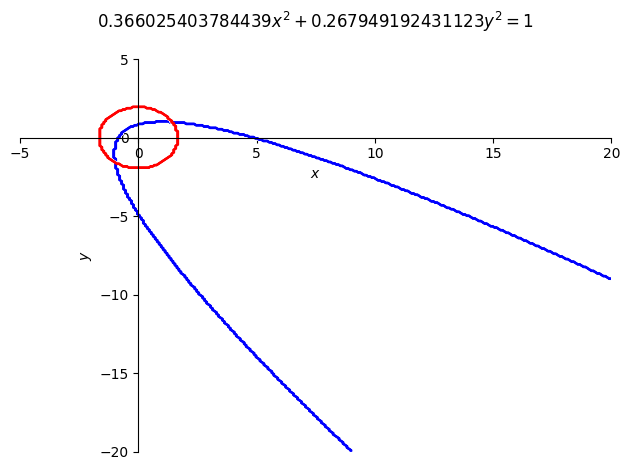

<IPython.core.display.Latex object>

In [145]:
X = Matrix([x, y, 1])
quadForm6 = Eq(x**2 + 2 * x * y + y**2 -4 * x + 4 * y - 4, 0)
lstCoefs = [1, 2, 1, -4, 4, -4]
mxQuad6 = ConvertQuadFormToMx(lstCoefs, False)
P_6 = EigenTransitionMx(mxQuad6)
mxQuadNew6 = CorrectZeroRepr(P_6.T * mxQuad6 * P_6)
quadNewForm6 = simplify(expand(X.T *mxQuadNew6 * X )[0])
canonicalQuadForm6 = ConvertToCanonical(quadNewForm6)

plt = plot_implicit(quadForm6, (x, -5, 20), (y, -20, 5),
                  line_color='blue',
                  xlabel='$x$', ylabel='$y$',
                   title=f'{latex(canonicalQuadForm6, mode="inline")}\n',
                   adaptive=False, show=False)
plt.append((plot_implicit(canonicalQuadForm6, (x, -5, 20), (y, -20, 5),
                       line_color='red',
                        adaptive=False, show=False))[0])
plt.show()

display(Latex(fr"\text{{Тип кривой второго порядкa }} {latex(quadForm6)} \ \text{{- Окружность/Элипс}}"))

###  Индивидуальное задание
Составить матрицу квадратичной формы и привести ее к каноническому виду с помощью перехода к новому базису из собственных векторов. Векторы выводить на экран не нужно. Вывести на экран матрицу в исходном виде и канонической форме, а также саму квадратичную форму в каноническом виде.

Варинат №43

$$Q = 1397 x^{2} + 20 \sqrt{3} x y + 18 \sqrt{11} x z + 900 y^{2} - 60 \sqrt{33} y z + 1103 z^{2}$$

In [ ]:
X = Matrix([x, y, z])
lstCoefs = [1397, 20 * sympy.sqrt(3), 900, 18 * sympy.sqrt(11), -60 * sympy.sqrt(33), 1103]
mxQuadInd = ConvertQuadFormToMx(lstCoefs, False)
P_ind = EigenTransitionMx(mxQuadInd)
mxQuadNewInd = P_ind.T * mxQuadInd * P_ind
quadFormInd = simplify(expand(X.T * mxQuadNewInd * X)[0])

display(Latex(fr"\text{{Матрица к.ф в исходном виде = }} {latex(mxQuadInd)}"))
display(Latex(fr"\text{{Матрица к.ф в каноническом виде = }} {latex(mxQuadNewInd )}"))
display(Latex(fr"\text{{Квадратичная форма в каноническом виде = }} {latex(quadFormInd)}"))